<a href="https://colab.research.google.com/github/TruongVanDuc19146177/AI/blob/main/CNN__fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from keras.models import Sequential
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randint
from skimage import color 
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D,Dense,Flatten

In [44]:
(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()

In [45]:
x_test.shape

(10000, 28, 28)

In [46]:
X=x_test

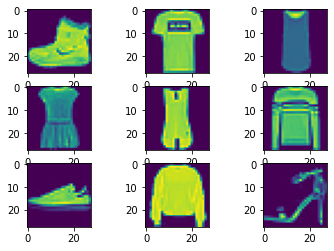

In [47]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [34]:
classes = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [48]:
#chuyen ve so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#xu li du lieu 
x_train/=255.0
x_test/=255.0
#one hot encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [49]:
# MODEL CNN
model = Sequential()
# BLOCK 1
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(28,28,1)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 3
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# Add ANN
model.add(Flatten())
model.add(Dense(128,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation = 'softmax'))
opt = SGD(lr= 0.01, momentum = 0.9)

model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 100, batch_size = 64, validation_data = (x_test,y_test), verbose = 1)
 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
938/938 [==============================] - 8s 8ms/step - loss: 0.4836 - accuracy: 0.8230 - val_loss: 0.3283 - val_accuracy: 0.8773
Epoch 2/100
938/938 [==============================] - 7s 7ms/step - loss: 0.2931 - accuracy: 0.8915 - val_loss: 0.3204 - val_accuracy: 0.8811
Epoch 3/100
938/938 [==============================] - 7s 7ms/step - loss: 0.2445 - accuracy: 0.9098 - val_loss: 0.2635 - val_accuracy: 0.9037
Epoch 4/100
938/938 [==============================] - 7s 7ms/step - loss: 0.2099 - accuracy: 0.9222 - val_loss: 0.2517 - val_accuracy: 0.9089
Epoch 5/100
938/938 [==============================] - 7s 7ms/step - loss: 0.1869 - accuracy: 0.9310 - val_loss: 0.2425 - val_accuracy: 0.9123
Epoch 6/100
938/938 [==============================] - 7s 7ms/step - loss: 0.1645 - accuracy: 0.9394 - val_loss: 0.2334 - val_accuracy: 0.9178
Epoch 7/100
938/938 [==============================] - 7s 7ms/step - loss: 0.1434 - accuracy: 0.9470 - val_loss: 0.2264 - val_accuracy: 0.9197

In [50]:
#luu model 
model.save('CNN_fashion_mnist.h5')

In [51]:
from keras.models import load_model
model5 = load_model('CNN_fashion_mnist.h5')

In [52]:
#danh gia model
score = model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 1s 4ms/step - loss: 0.6791 - accuracy: 0.9139


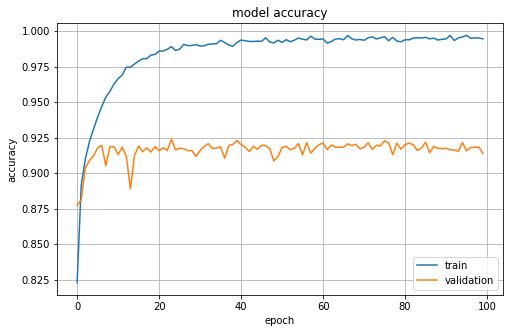

In [53]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()

'Trouser'

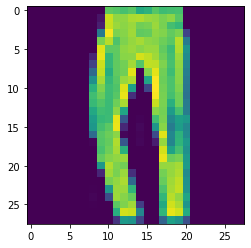

In [66]:
#kiem tra do chinh xac cua model bang du lieu x_test
plt.imshow(X[5])
y_pred=model.predict(x_test)
label=int(np.argmax(y_pred[5]))
classes[label]